In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from enum import Enum
import numpy as np
from matplotlib import cm
from matplotlib.patches import Patch
import seaborn as sns


# read file
df = pd.read_excel('survey-results.xlsx')

schemes = ['Singular Constant', 'Singular Varying', 'Wall Constant', 'Wall Varying', 'Wave Constant', 'Wave Varying']


# define constants
class Column(Enum):
    AGE = 'What is your age'
    FREQUENCY = 'How often do you cycle?'
    TACTOR_DIRECTION = 'If an approaching vehicle is far, which tactor would you expect to be activated?'
    OVERALL_PREFERENCE = 'Which encoding scheme did you prefer? (1 - most preferred, 6 - least preferred)'
    ALERT_LIKERT = 'Please give your response for each scheme for the following statement: "If I were cycling, this scheme would be useful in alerting me of an approaching vehicle from behind"'
    DISTINGUISH_LIKERT = 'Please give your response for each scheme for the following statement: "It was easy to distinguish between different cues (vibrations for different distances)"'
    DISTINGUISH_COMMENT = 'Do you have any further comments regarding the distinguishability of the schemes?'

TOTAL_RESPONDENTS = len(df)
titlesize = 18
axissize = 16
valuesize = 14
tablesize = 12
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']


# define methods
def create_table(data, colLabels, cellLoc='center', loc='right', colLoc='center', fontsize=12, scale=(0.5, 1.5)):
    cell_text = []
    
    # get percentage of total
    total = data.sum()
    percentage_values = (data / total) * 100
    
    # add values to table
    for index, value in data.items():
        perc = percentage_values.loc[index]
        cell_text.append([index, value, f'{perc:.2f}%'])
    cell_text.append(['', total, '100%'])
    
    # create and customise table
    table = plt.table(cellText=cell_text, colLabels=colLabels, cellLoc=cellLoc, loc=loc, colLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(fontsize)
    table.scale(*scale)
    
def create_bar_plot(data, x_label, y_label, title, grid=True, show_table=False, figsize=(10, 6), tablecols=None):
    fig, ax = plt.subplots(figsize=figsize)
    
    bars = data.plot(kind='bar', color=colors, zorder=2, ax=ax)
    plt.title(title, fontsize=titlesize)
    plt.xlabel(x_label, fontsize=axissize)
    plt.ylabel(y_label, fontsize=axissize)
    
    # adjust tick label size and rotation
    plt.tick_params(axis='both', which='major', labelsize=valuesize)
    plt.xticks(rotation=0)
    
    # add grid lines
    if grid:
        plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1)
        
    # remove borders
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # add table
    if show_table:
        create_table(data=data, colLabels=tablecols, fontsize=tablesize)
        
def create_pie_chart(data, labels, title, explode=None, autopct='%1.1f%%', show_table=False, figsize=(10, 6), tablecols=None):
    fig, ax = plt.subplots(figsize=figsize)
        
    if explode is None:
        explode = [0] * len(data)
        
    plt.pie(data, labels=labels, colors=colors, explode=explode, autopct=autopct, startangle=90, counterclock=False, textprops={'fontsize': valuesize})
    plt.title(title, fontsize=16)
    
    # add table
    if show_table:
        create_table(data=data, colLabels=tablecols, fontsize=tablesize, scale=(1, 2))


# Demographic

## Cycle Frequency

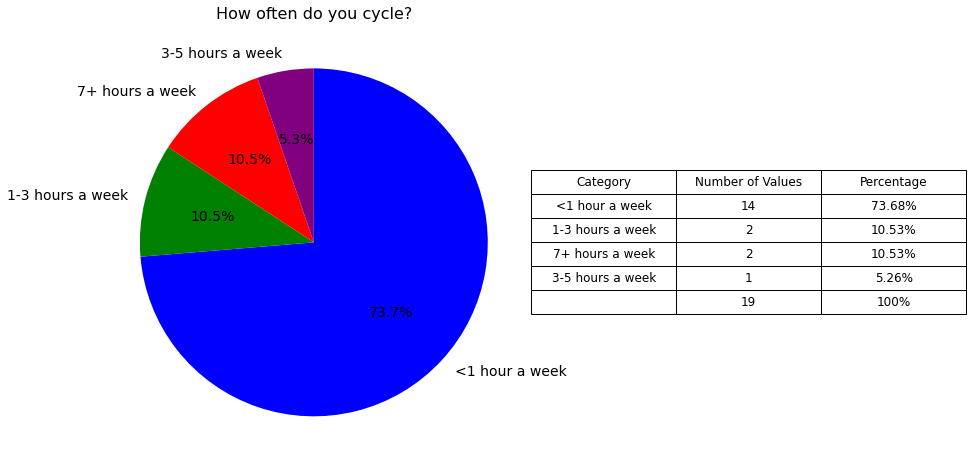

In [2]:
frequency_count = df[Column.FREQUENCY.value].value_counts()
create_pie_chart(data=frequency_count, labels=frequency_count.index, title=Column.FREQUENCY.value,
                show_table=True, figsize=(12,8), tablecols=['Category', 'Number of Values', 'Percentage'])

plt.show()

# Initial Thoughts on Tactors: Spacing, Location, and Perception

1 - well spread out and the right amount of intensity. My head is small so rear didn't touch properly.

2 - Spacing was good, front motor weak

3 - able to distinguish but middle and front weak

4 - was fine

5 - front was weak

6 - front and rear was weak

7 - "Spacing was good, layout makes sense in relation to the problem and the tactors are sufficiently powerl"

8 - Could distinguish but front and middle were very weak

P9: "Spacing makes sense, though I would have potentially rotated them all further back. Even the back feels relatively high on my head, and it seems as though they are fairly close to each other where they could be further apart. That said, they are easily distinguishable. The vibrations decrease in strength from back to front, from totally okay to potentially less than expected. As a rider of a road bike with no suspension, I imagine the Glasgow roads could at times be rough enough that I wouldn’t feel the front vibrations."

P11 - 20:
Middle and Front was quite weak.
Mixed between good spacing and could be further spaced.
Especially the middle tactor was weak

P11 said "They feel a bit weaker than I expected. They where distinguishable. I expected the middle one to be where the front one is and the front one to be more towards the forehead"

# Encoding Schemes
## Rankings

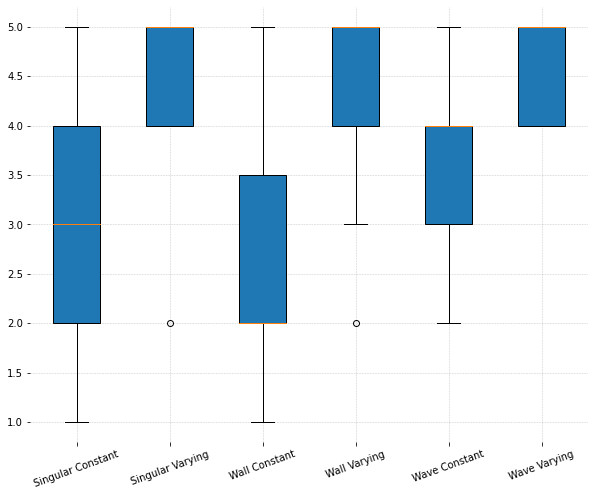

In [3]:
scheme_ratings = {
    "Singular Constant": [0, 0, 0, 0, 0, 0],
    "Singular Varying": [0, 0, 0, 0, 0, 0],
    "Wall Constant": [0, 0, 0, 0, 0, 0],
    "Wall Varying": [0, 0, 0, 0, 0, 0],
    "Wave Constant": [0, 0, 0, 0, 0, 0],
    "Wave Varying": [0, 0, 0, 0, 0, 0],
}

preference_count = df[Column.OVERALL_PREFERENCE.value].value_counts()
for order, amount in preference_count.items():
    o = order.split(';')
    order_list = [scheme.replace(u'\xa0', u' ') for scheme in o]
    for rank in range(0, len(order_list)):
        s = order_list[rank]
        for scheme in scheme_ratings.keys():
            if s.find(scheme) != -1:
                 scheme_ratings[scheme][rank] += amount

                    
useful_scores = {}
distinguish_scores = {}
interpret_scores = {}
intuitive_scores = {}
length_scores = {}
perception_scores = {}
likert_questions = [useful_scores, distinguish_scores, interpret_scores, intuitive_scores, length_scores]
likert_questions_tactors = [perception_scores]

schemes = ['Singular Constant', 'Singular Varying', 'Wall Constant', 'Wall Varying', 'Wave Constant', 'Wave Varying']
tactors = ['Rear', 'Mid', 'Front']
ratings = ["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"]
abbr_ratings = ["Str. Dis.", "Dis.", "Neu.", "Agr.", "Str. Agr."]
color_map = ['#d7191c', '#fdae61', '#808080', '#a6d96a', '#1a9641']
likert_scale_values = {'Strongly Disagree': 1, 'Disagree': 2, 'Neutral': 3, 'Agree': 4, 'Strongly Agree': 5}
spines = ['top', 'right', 'bottom', 'left']


def get_likert_data(questions, values):
    for i in range(len(questions)):
        d = questions[i]
        for s in values:
            d[s] = {}
            for r in ratings:
                d[s][r] = 0

            if i == 0:
                sch = s
            else:
                sch = s+str(i+1)
            results = df[sch]
            for r in results:
                d[s][r] += 1    

                
def get_stats(data):
    df = pd.DataFrame(data).T
    df = df.iloc[::-1]
    df['Total'] = df.sum(axis=1)
    for col in df.columns[:-1]:
        df[col] = df[col] / df['Total'] * 100
    df['Average'] = df.apply(lambda row: np.average([1, 2, 3, 4, 5], weights=row[:-1]), axis=1)
    df['Std'] = df.apply(lambda row: np.sqrt(np.average((np.array([1, 2, 3, 4, 5]) - row['Average'])**2, weights=row[:-2])), axis=1)
    df[['Average', 'Std']]
    return df


def get_scores(data):
    scores = []
    for val, rat in data.items():
        rates = []
        score = 1
        for rating, amount in rat.items():
            x = [score] * amount
            rates += x
            score += 1
        scores.append(rates)        
    return scores


def likert_vis(data, title, bar_height = 1.5, figsize=(12,8), save=False, showtitle=True, 
               start=-100, end=100, textsize=12, boxplot=False, drop_spines=spines):
    
    df = get_stats(data)
    scores = get_scores(data)
    fig, ax = plt.subplots(figsize=figsize)
    
    if boxplot:
        plt.boxplot(scores, vert=True, patch_artist=True)  # 'vert=True' for vertical boxplots, 'patch_artist=True' for fill color
        plt.xticks(range(1, len(data) + 1), schemes, rotation=20)
        
    else:
        initial_y_position = 0
        spacing = bar_height + (bar_height/2)
        for idx, (index, row) in enumerate(df.iterrows()):
            color_i = 0
            initial_left = -sum(row[['Strongly Disagree', 'Disagree']])
            left = initial_left
            y_position = initial_y_position + (idx * spacing)
            total_width = sum(row[ratings])

            for col in ratings:
                bar_width = row[col]
                ax.barh(y_position, bar_width, left=left, height=bar_height, color=color_map[color_i], edgecolor='white')
                color_i = color_i + 1

                text_col = 'black'
                if bar_width == 0:
                    continue
                elif bar_width < 30:
                    ax.text(left + row[col] / 2, y_position, f"{round(bar_width * row['Total'] / 100)} ({bar_width:.1f}%)", 
                            va='center', ha='center', color=text_col, rotation='vertical', fontsize=textsize-2)
                else:
                    ax.text(left + row[col] / 2, y_position, f"{round(bar_width * row['Total'] / 100)} ({bar_width:.1f}%)", 
                            va='center', ha='center', color=text_col, fontsize=textsize)
                left += row[col]

            center_of_full_bar = (left + initial_left) / 2
            # add avg and std
            ax.text(left + 5, y_position, f"Avg: {row['Average']:.2f}\nStd: {row['Std']:.2f}", va='center', ha='left', color='black', fontsize=textsize,
                   bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
            # add name
            ax.text(center_of_full_bar, y_position+(bar_height/2), index, va='bottom', ha='center', color='black', fontsize=textsize,
                   zorder=99, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2'))
            
        # Set the x-ticks to be symmetrical around 0% (center)
        ax.set_xticks([i for i in range(start, end+1, 20)])
        ax.set_xticklabels([str(i)+"%" for i in range(start, end+1, 20)], fontsize=textsize)
        ax.axvline(0, color='black', linewidth=1)
        ax.get_yaxis().set_visible(False) # remove y-axis
        legend_patches = [Patch(color=color_map[i], label=abbr_ratings[i]) for i in range(len(abbr_ratings))]
        ax.legend(handles=legend_patches, title='Rankings', bbox_to_anchor=(0.5, -0.08), 
              loc='upper center', ncol=len(ratings), fontsize=textsize-2, title_fontsize=textsize-2)
        

    df = df.drop(columns=['Total', 'Average'])
    for spine in drop_spines:
        ax.spines[spine].set_visible(False)

    if showtitle:
        ax.set_title(title, fontsize=16, pad=20)  
    ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7) #add gridlines
    
    if save:
        plt.savefig(f"{title}.pdf", bbox_inches = 'tight', pad_inches = 0.1, transparent = True,)

    plt.show()
    
    
    
get_likert_data(likert_questions, schemes)
get_likert_data(likert_questions_tactors, tactors)
#likert_vis(perception_scores,'Perception of Tactors', bar_height=1, figsize=(8,6), save=True, showtitle=False, start=-40, textsize=15)
likert_vis(useful_scores,' Encoding Schemes Usefulness Ratings', drop_spines=spines, figsize=(10,8), showtitle=False, textsize=14, boxplot=True)

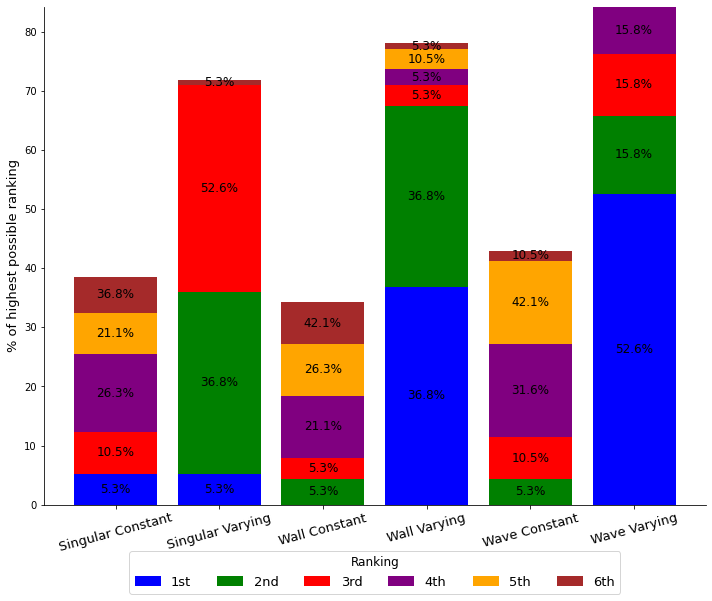

In [4]:
def rankify(x):
    if (x==1):
        return str(x)+'st'
    elif (x==2):
        return str(x)+"nd"
    elif (x==3):
        return str(x)+"rd"
    else:
        return str(x)+"th"

    
def weighted_stacked_bar(data, title, figsize=(10, 10), fontsize=14, showtitle=False, save=False, drop_spines=[], vertical=False):
    lowest_score = 19 
    highest_score = 114
    bar_width = 0.8
    spacing = 0
    
    rank_scores = [6, 5, 4, 3, 2, 1]
    scheme_scores = {scheme: sum([a*b for a,b in zip(rank_scores, ranks)]) for scheme, ranks in data.items()}
    if vertical:
        reversed_sorted_schemes = schemes
    else:
        reversed_sorted_schemes = schemes[::-1]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    total_possible_score = sum(rank_scores) * len(data[next(iter(data))])
    
    for i, scheme in enumerate(reversed_sorted_schemes):
        cumulative = 0
        for j in range(len(rank_scores)):
            # Calculate the length of each segment
            n = data[scheme][j]
            segment_length = (n * rank_scores[j]) / highest_score * 100
            percentage = f"{n / 19:.1%}"
            
            if vertical:
                new_i = i-(i*spacing)
                bar = ax.bar(new_i, segment_length, width=bar_width, bottom=cumulative, color=colors[j])
                text_x = new_i
                text_y = cumulative + segment_length/2
                rotation = 'horizontal'
            else:
                bar = ax.barh(scheme, segment_length, left=cumulative, color=colors[j])
                text_x = cumulative + segment_length/2
                text_y = i
                rotation = 'vertical' if segment_length < 10 else 'horizontal'
                
            cumulative += segment_length

            if segment_length > 0:
                ax.text(text_x, text_y, percentage, ha='center', va='center', rotation=rotation, fontsize=fontsize-2, color='black')

    if vertical:
        ax.set_xticks([i-(i*spacing) for i in range(len(schemes))])
        ax.set_ylabel("% of highest possible ranking", fontsize=fontsize-1)
        ax.set_xticklabels(reversed_sorted_schemes, fontsize=fontsize-1, rotation=15)
    else:
        ax.set_xlabel("% of highest possible ranking", fontsize=fontsize-1)
        ax.set_yticklabels(reversed_sorted_schemes, fontsize=fontsize-1)
        

    legend_scores = [rankify(i) for i in rank_scores[::-1]]
    ax.legend(legend_scores, title="Ranking", bbox_to_anchor=(0.5, -0.08), loc='upper center', 
              ncol=len(rank_scores), fontsize=fontsize-1, title_fontsize=fontsize-2)
    
    for spine in drop_spines:
        ax.spines[spine].set_visible(False)
    if showtitle:
        ax.set_title(title, fontsize=fontsize+1)  
    if save:
        plt.savefig(f"{title}.pdf", bbox_inches = 'tight', pad_inches = 0.05, transparent = True,)


    plt.tight_layout(rect=[0, 0.15, 1, 1])
    plt.show()

    
weighted_stacked_bar(scheme_ratings, figsize=(7, 10), title="Weighted Scheme Rankings", save=True, drop_spines=['top','right'], vertical=True)

## Usefulness in Alerting Me

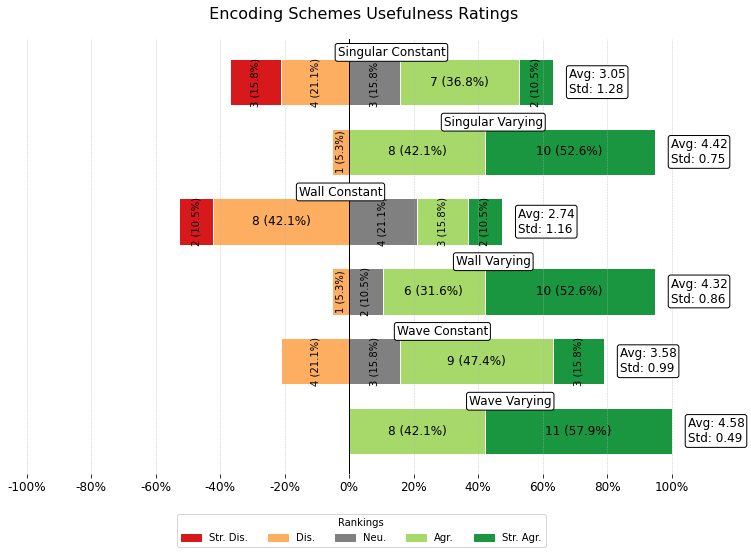

In [5]:
likert_vis(useful_scores,' Encoding Schemes Usefulness Ratings')

## Distinguishibility and Interpretation

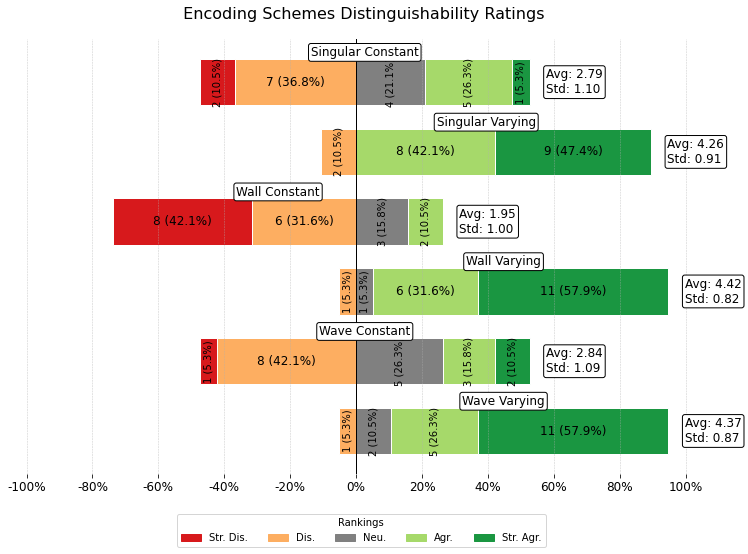

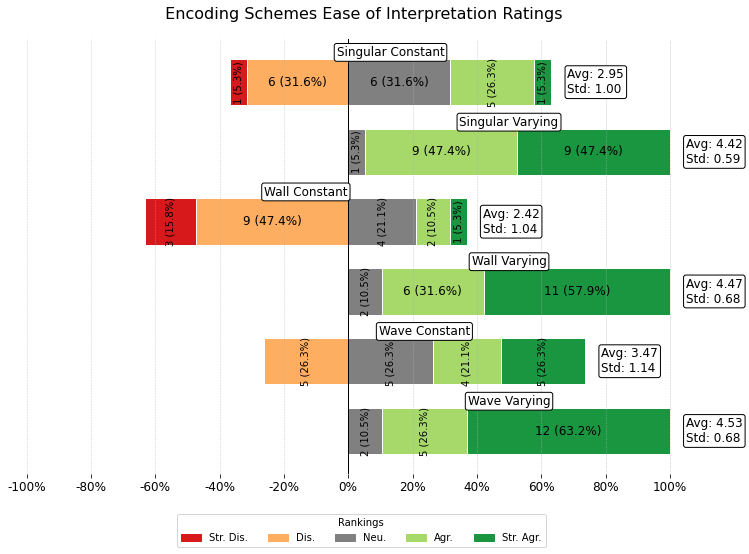

In [6]:
likert_vis(distinguish_scores,' Encoding Schemes Distinguishability Ratings')
likert_vis(interpret_scores,' Encoding Schemes Ease of Interpretation Ratings')

## Intuitiveness (Ease of Learning)

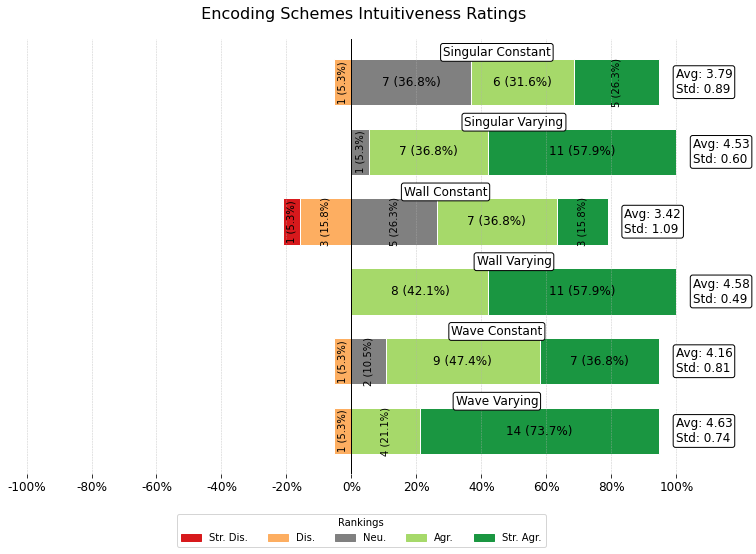

In [7]:
likert_vis(intuitive_scores,' Encoding Schemes Intuitiveness Ratings')

## Length of Cues

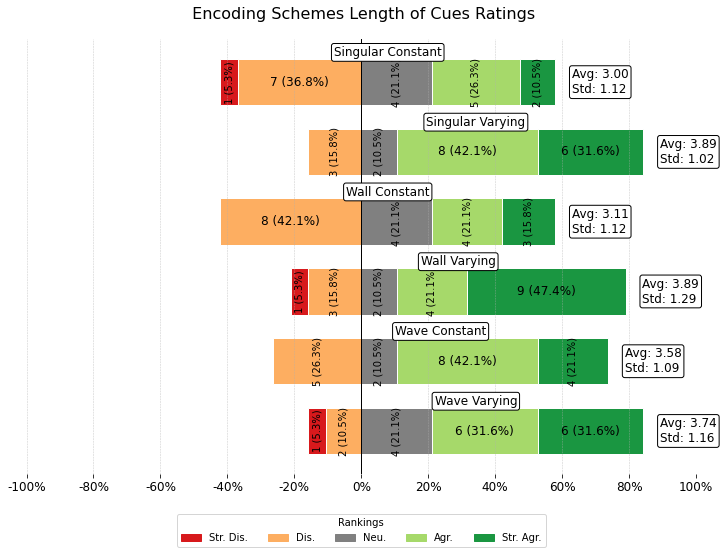

In [8]:
likert_vis(length_scores,' Encoding Schemes Length of Cues Ratings')

## Perception of Tactors

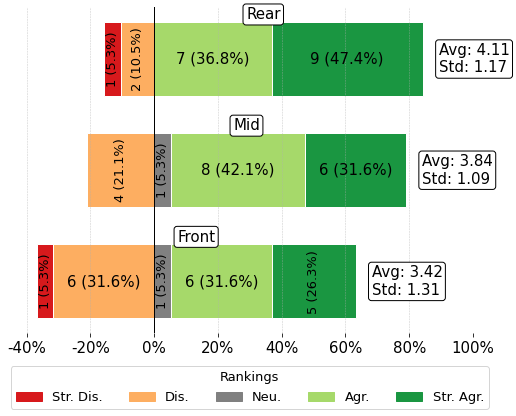

In [9]:
likert_vis(perception_scores,'Perception of Tactors', bar_height=1, figsize=(8,6), save=True, showtitle=False, start=-40, textsize=15)

## Comfyness Rating

In [10]:
comfy_ratings = np.array(df['Please rate how comfortable the helmet felt whilst on your head.'].values)
print(comfy_ratings)
stds = np.std(comfy_ratings)
print(f"{stds:.2f}")

[ 8  8  5  6  8  7  3  9  8  9  2  8  9  8  8  8 10  6 10]
2.08


# Stats

The Chi-Square statistic measures the extent of the differences among the ranks of the related groups (e.g. 'Rear', 'Mid', 'Front'). It is calculated based on the differences in rank sums across these groups, adjusted for the number of groups and the number of observations within each group.

In [11]:
import scipy.stats as stats
import itertools

schemes = ['Singular Constant', 'Singular Varying', 'Wall Constant', 'Wall Varying', 'Wave Constant', 'Wave Varying']
tactors = ['Rear', 'Mid', 'Front']
alpha = 0.05


def calc_stats(data, values, title, calc_score=True):
    print(f"\n\n{title.upper()}:\n---------------")
    print(data)
    if calc_score:
        scores = get_scores(data)      
        print(scores)
    else:
        scores = data
    
    # Calculate mean and SD
    means = np.mean(scores, axis=1)
    stds = np.std(scores, axis=1)
    print("\nGENERAL STATS:")
    for v, m, s in zip(values, means, stds):
        print(f"{v}: mean: {m:.2f}   sd: {s:.2f}")
    
    
    # Perform Friedman's test
    print(f"\nFRIEDMANS ANOVA TEST:\nalpha={alpha}")
    chi_square, p = stats.friedmanchisquare(*scores)
    print(f"Chi_Square: {chi_square:.2f}   p: {p}")
    if p > alpha:
        return
    print(f"""As p<{alpha}, the {title} is significantly different (i.e. at least one of their ratings significantly differ from the others. To know the difference between individual conditions we now apply Wilcoxon tests on each pair of conditions\n""")
    
    # Wilcoxen tests
    print("WILCOXEN SIGNED-RANK TESTS:")
    pairs = list(itertools.combinations(scores, 2))
    conditions = list(itertools.combinations(values, 2))
    corrected_alpha = alpha/len(pairs)
    print(f"Bonferroni corrected alpha={corrected_alpha:.4f}")
    for condition, p in zip(conditions, pairs):
        w_stat, p = stats.wilcoxon(p[0], p[1], alternative='two-sided')
        print(f"{condition[0]} vs {condition[1]}:\n\tW Statistic: {w_stat:.2f}   p: {p:.4f}")
        if p > corrected_alpha:
            print(f"\tNo significant difference between {condition[0]} and {condition[1]}")
            continue
        print(f"""\tAs p<{corrected_alpha:.4f} there is significant difference between {condition[0]} and {condition[1]}""")
      

        
rating_scores = []
for ranks in scheme_ratings.values():
    score = 1
    l = []
    for r in ranks:
        x = [score] * r
        l += x
        score +=1
    rating_scores.append(l)
    

calc_stats(rating_scores, schemes, "ratings of the schemes", calc_score=False)
#calc_stats(perception_scores, tactors, "perception of the tactors")
#calc_stats(useful_scores, schemes, "usefulness of the schemes")
#calc_stats(distinguish_scores, schemes, "distinguishability of the schemes")
#calc_stats(interpret_scores, schemes, "interpretability of the schemes")
#calc_stats(intuitive_scores, schemes, "intuitiveness of the schemes")
#calc_stats(length_scores, schemes, "length of the schemes")



RATINGS OF THE SCHEMES:
---------------
[[1, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6], [1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6], [2, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6], [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 4, 5, 5, 6], [2, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4]]

GENERAL STATS:
Singular Constant: mean: 4.68   sd: 1.34
Singular Varying: mean: 2.68   sd: 0.98
Wall Constant: mean: 4.95   sd: 1.15
Wall Varying: mean: 2.32   sd: 1.52
Wave Constant: mean: 4.42   sd: 0.99
Wave Varying: mean: 1.95   sd: 1.15

FRIEDMANS ANOVA TEST:
alpha=0.05
Chi_Square: 80.17   p: 7.721876120477211e-16
As p<0.05, the ratings of the schemes is significantly different (i.e. at least one of their ratings significantly differ from the others. To know the difference between individual conditions we now apply Wilcoxon tests on each pair of conditions

WILCOXEN SIGNED-RANK TESTS:
Bonfe

C:\Users\lewis\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\lewis\anaconda3\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")



<br><br>
<br><br>
<br><br>

# Results

In [143]:
# read data
df_results = pd.read_excel('participant-results.xlsx', sheet_name="Results")
df_trials = pd.read_excel('participant-results.xlsx', sheet_name='Trials')
df_results['Participant ID'] = df_results['Participant ID'].ffill()
participants_dict = {pid: group for pid, group in df_results.groupby('Participant ID')}

# define constants
schemes = ['Singular Constant', 'Singular Varying', 'Wall Constant', 'Wall Varying', 'Wave Constant', 'Wave Varying']
guess_columns = ['Guess 1', 'Guess 2', 'Guess 3', 'Guess 4', 'Guess 5', 'Guess 6', 'Guess 7', 'Guess 8', 'Guess 9', 'Guess 10', 'Guess 11', 'Guess 12']
data_trials = [2, 3, 5, 6, 8, 9, 11, 12, 14, 15, 17, 18]
distances = ["FAR", "NEAR", "IMMINENT"]


def get_participant_totals():
    participant_totals = {}
    # for each participants
    for part_id, part_df in participants_dict.items():
        trial_totals = []
        participant_totals[part_id] = {}
        participant_totals[part_id]["trials"] = []
        participant_totals[part_id]["schemes"] = []
        participant_totals[part_id]["aggs"] = {}
        participant_totals[part_id]["distance_mistakes"] =  {"FAR": [], "NEAR": [], "IMMINENT": []}

        # for each trial
        for _, trial_row in part_df.iterrows():
            trial_number = trial_row['Trial']  # get the trial no.
            scheme = trial_row['Scheme'] # get the scheme
            trial_data = {
                "trial_id": trial_number,
                "scheme": scheme,
                "guesses": []
            }

            if pd.notna(trial_number): # if trial row not blank
                total_trial_correct = 0
                # add scheme
                if pd.notna(scheme) and scheme not in participant_totals[part_id]["schemes"]:
                    participant_totals[part_id]["schemes"].append(scheme)

                # for each guess
                for guess_col in guess_columns:
                    if guess_col in trial_row and guess_col in df_trials.columns:
                        # get participant guess
                        participant_guess = trial_row[guess_col]
                        trial_data["guesses"].append(participant_guess)
                        # check if answer is correct
                        correct_answer = df_trials.loc[trial_number - 1, guess_col]
                        if pd.notna(participant_guess):
                            if participant_guess == correct_answer:
                                total_trial_correct += 1 
                            else:
                                if trial_number in data_trials:
                                    participant_totals[part_id]["distance_mistakes"][correct_answer].append([scheme, participant_guess])
                trial_totals.append(total_trial_correct)

            participant_totals[part_id]["trials"].append(trial_data)
        participant_totals[part_id]["aggs"]["trial_totals"] = trial_totals
        participant_totals[part_id]["aggs"]["training_trial_totals"] = [trial_totals[i] for i in [0, 3, 6, 9, 12, 15]]
        participant_totals[part_id]["aggs"]["data_trial_totals"] = [trial_totals[i] for i in [1, 2, 4, 5, 7, 8, 10, 11, 13, 14, 16, 17]]
        participant_totals[part_id]["aggs"]["total"] = sum(trial_totals)
        participant_totals[part_id]["aggs"]["training_total"] = sum(participant_totals[part_id]["aggs"]["training_trial_totals"])
        participant_totals[part_id]["aggs"]["data_total"] = sum(participant_totals[part_id]["aggs"]["data_trial_totals"])
        
    return participant_totals


def get_scheme_totals(participant_totals):
    scheme_totals = {}
    for s in schemes:
        scheme_totals[s] = []
    for p, results in participant_totals.items():
        scheme_order = results["schemes"]
        t = results["aggs"]["data_trial_totals"]
        totals = [t[i] + t[i+1] for i in range(0, len(t), 2)]
        for s in schemes:
            i = scheme_order.index(s)
            scheme_totals[s] += [totals[i]]

    return scheme_totals


def get_mistakes():
    distance_mistakes = {"FAR": [], "NEAR": [], "IMMINENT": []}
    mistakes_schemes = {}
    mistake_count = {}
    part_mistake_count = {}
    mistake_by_part = {}
    
    
    for p, value in participant_totals.items():
        mistake_by_part[p] = {}
        for s in schemes:
            mistake_by_part[p][s] = {}
            for d in distance_mistakes.keys():
                mistake_by_part[p][s][d] = {}
                for e in list(distance_mistakes.keys()) + ["MISSED"]:
                    mistake_by_part[p][s][d][e] = 0
                    
        mis = value["distance_mistakes"]
        for c, mistakes in mis.items():
            for m in mistakes:
                scheme = m[0]
                guess = m[1]
                mistake_by_part[p][scheme][c][guess] += 1
            

        
    # init mistake counts
    for dis in distance_mistakes.keys():
        mistake_count[dis] = {}
        part_mistake_count[dis] = {}
        for s in schemes:
            mistake_count[dis][s] = 0
            part_mistake_count[dis][s] = []
            for p in range(0, len(participant_totals.keys())):
                part_mistake_count[dis][s].append(0)
            
    # init mistake_scheme count
    for s in schemes:
        mistakes_schemes[s] = {}
        for dis in distance_mistakes.keys():
            mistakes_schemes[s][dis] = {}
            for d in list(distance_mistakes.keys()) + ["MISSED"]:
                mistakes_schemes[s][dis][d] = 0

    # combine participant mistakes
    for p, results in participant_totals.items():
        d = results["distance_mistakes"]
        for distance, mistakes in d.items():
            distance_mistakes[distance] += mistakes
            for m in mistakes:
                if p > 13:
                    i = int(p-2)
                else:
                    i = int(p-1)
                part_mistake_count[distance][m[0]][i] += 1

    # count mistakes       
    for dis, mistakes in distance_mistakes.items():
        for m in mistakes:
            s = m[0]
            guess = m[1]
            mistake_count[dis][s] += 1
            mistakes_schemes[s][dis][guess] += 1
            
    return (distance_mistakes, mistakes_schemes, mistake_count, part_mistake_count, mistake_by_part)
        
    
participant_totals = get_participant_totals()
scheme_totals = get_scheme_totals(participant_totals)
distance_mistakes, mistakes_schemes, mistake_count, part_mistake_count, mistake_by_part = get_mistakes()

print(mistake_by_part)

{1.0: {'Singular Constant': {'FAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'NEAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'IMMINENT': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}}, 'Singular Varying': {'FAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'NEAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'IMMINENT': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}}, 'Wall Constant': {'FAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'NEAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'IMMINENT': {'FAR': 0, 'NEAR': 5, 'IMMINENT': 0, 'MISSED': 0}}, 'Wall Varying': {'FAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'NEAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'IMMINENT': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}}, 'Wave Constant': {'FAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'NEAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'IMMINENT': {'FAR': 0, 'NEAR': 1, 'IMMINENT': 0, 'MISSED

C:\Users\lewis\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


## One way Repeated-Measures ANOVA

A one-way repeated-measures ANOVA is performed on each distance category, to compare the means of the total percentage correct for each participants across the 6 schemes.

In [156]:
from statsmodels.stats.anova import AnovaRM 
from statsmodels.stats.multicomp import pairwise_tukeyhsd



def tukey_test(data, anova_results):
    tukey = pairwise_tukeyhsd(endog=data['Count'], groups=data['Scheme'], alpha=0.05/6)
    print(tukey)

    

    
for d in part_mistake_count.keys():
    print(f"\nAre there variances across the means of schemes WITHIN THE {d} DISTANCE\n")
    data = []
    for i in range(len(part_mistake_count[d][s])):
        for s in schemes:
            data.append({
                "Participant": i,
                "Scheme": s,
                "Count": (8-part_mistake_count[d][s][i])/8*100
            })
            
    df5 = pd.DataFrame(data)
    print(df5[:12])
    anova_results = AnovaRM(data=df5, depvar='Count', subject='Participant', within=['Scheme']).fit()
    print(anova_results)
    tukey_test(df5, anova_results)

    

all_data = []
for i in range(19):
    for s in schemes:
        count = 0
        for d in part_mistake_count.keys():
            count += part_mistake_count[d][s][i]
        all_data.append({
            "Participant": i,
            "Scheme": s,
            "Count": (24-count)/24*100
        })   
print(f"\nAre there variances across the means of schemes ACROSS ALL DISTANCES\n")
df_all = pd.DataFrame(all_data)
anova_results = AnovaRM(data=df_all, depvar='Count', subject='Participant', within=['Scheme']).fit()
print(anova_results)
tukey_test(df_all, anova_results)


Are there variances across the means of schemes WITHIN THE FAR DISTANCE

    Participant             Scheme  Count
0             0  Singular Constant  100.0
1             0   Singular Varying  100.0
2             0      Wall Constant  100.0
3             0       Wall Varying  100.0
4             0      Wave Constant  100.0
5             0       Wave Varying  100.0
6             1  Singular Constant  100.0
7             1   Singular Varying  100.0
8             1      Wall Constant  100.0
9             1       Wall Varying  100.0
10            1      Wave Constant   87.5
11            1       Wave Varying  100.0
               Anova
       F Value Num DF  Den DF Pr > F
------------------------------------
Scheme  0.9178 5.0000 90.0000 0.4733

           Multiple Comparison of Means - Tukey HSD, FWER=0.01            
      group1           group2      meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------------
Singular Constant Sing

## Two-Way Repeated Measures ANOVA

A two-way repeated-measures ANOVA is performed, to compare the means of the total percentage correct for each participant across the 6 schemes and 3 distance categories.

In [186]:
from statsmodels.stats.anova import AnovaRM 
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pingouin as pg


data = []
for i in range(19):
    for s in schemes:
        for d in part_mistake_count.keys():
            data.append({
                "Participant": i,
                "Scheme": s,
                "Conveyed_Distance": d,
                "Perc": (8-part_mistake_count[d][s][i])/8*100
            })
            
df5 = pd.DataFrame(data)
print(df5[:19])
# Compute the 2-way repeated measures ANOVA.
# Scheme and Distance are the within-subject factors, and Count is the dependent variable
pg.rm_anova(dv='Perc', within=['Scheme', 'Conveyed_Distance'], subject='Participant', data=df5)
#anova_results = AnovaRM(data=df5, depvar='Perc', subject='Participant', within=['Scheme', 'Conveyed_Distance']).fit()
#anova_results.summary()

# Optional post-hoc tests
#pg.pairwise_ttests(dv='Perc', within=['Scheme', 'Conveyed_Distance'], subject='Participant', data=df5)

    Participant             Scheme Conveyed_Distance   Perc
0             0  Singular Constant               FAR  100.0
1             0  Singular Constant              NEAR  100.0
2             0  Singular Constant          IMMINENT  100.0
3             0   Singular Varying               FAR  100.0
4             0   Singular Varying              NEAR  100.0
5             0   Singular Varying          IMMINENT  100.0
6             0      Wall Constant               FAR  100.0
7             0      Wall Constant              NEAR  100.0
8             0      Wall Constant          IMMINENT   37.5
9             0       Wall Varying               FAR  100.0
10            0       Wall Varying              NEAR  100.0
11            0       Wall Varying          IMMINENT  100.0
12            0      Wave Constant               FAR  100.0
13            0      Wave Constant              NEAR  100.0
14            0      Wave Constant          IMMINENT   87.5
15            0       Wave Varying      

C:\Users\lewis\anaconda3\lib\site-packages\pingouin\distribution.py:515: UserWarning: Epsilon values might be innaccurate in two-way repeated measures design where each  factor has more than 2 levels. Please  double-check your results.
  warnings.warn(


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,Scheme,14190.880848,5,90,2838.176170,9.252913,3.901497e-07,0.000093,0.188147,0.547380
1,Conveyed_Distance,4238.852339,2,36,2119.426170,14.855364,1.976933e-05,0.000079,0.064743,0.828052
2,Scheme * Conveyed_Distance,7137.244152,10,180,713.724415,6.833439,5.194028e-09,0.000882,0.104390,0.272179


In [185]:
def get_count(data, d1, d2):
    if d1 == d2:
        return 24 - sum(data[d1].values())
    else:
        return data[d1][d2]
    

data = []
for i in mistake_by_part.keys():
    for s in schemes:
        for d1 in part_mistake_count.keys():
            for d2 in part_mistake_count.keys():
                mistakes = get_count(mistake_by_part[i][s], d1, d2)
                data.append({
                    "Participant": i,
                    "Scheme": s,
                    "Conv_Distance": d1,
                    "Guess_Distance": d2,
                    "Count": mistakes,
                    "Perc": f"{(mistakes/24*100):.1f}%"
                })
            
df5 = pd.DataFrame(data)
print(df5[22:28])

    Participant         Scheme Conv_Distance Guess_Distance  Count    Perc
22          1.0  Wall Constant          NEAR           NEAR     24  100.0%
23          1.0  Wall Constant          NEAR       IMMINENT      0    0.0%
24          1.0  Wall Constant      IMMINENT            FAR      0    0.0%
25          1.0  Wall Constant      IMMINENT           NEAR      5   20.8%
26          1.0  Wall Constant      IMMINENT       IMMINENT     19   79.2%
27          1.0   Wall Varying           FAR            FAR     24  100.0%


In [153]:
#anova_results = AnovaRM(data=df5, depvar='Count', subject='Participant', within=['Scheme', 'Distance']).fit()
#anova_results.summary()

tukey_scheme = pairwise_tukeyhsd(endog=df5['Count'], groups=df5['Scheme'], alpha=0.05/6)

# Tukey's HSD for 'Distance'
tukey_distance = pairwise_tukeyhsd(endog=df5['Count'], groups=df5['Conveyed_Distance'], alpha=0.05/3)

tukey_scheme.summary()
#tukey_distance.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Singular Constant,Singular Varying,6.5789,0.163,-2.9117,16.0696,False
Singular Constant,Wall Constant,-10.5263,0.0022,-20.017,-1.0357,True
Singular Constant,Wall Varying,7.4561,0.0763,-2.0345,16.9468,False
Singular Constant,Wave Constant,-1.3158,0.9969,-10.8065,8.1749,False
Singular Constant,Wave Varying,7.2368,0.0934,-2.2538,16.7275,False
Singular Varying,Wall Constant,-17.1053,0.0,-26.5959,-7.6146,True
Singular Varying,Wall Varying,0.8772,0.9996,-8.6135,10.3679,False
Singular Varying,Wave Constant,-7.8947,0.0499,-17.3854,1.5959,False
Singular Varying,Wave Varying,0.6579,0.9999,-8.8328,10.1486,False
Wall Constant,Wall Varying,17.9825,0.0,8.4918,27.4731,True


anova_results = AnovaRM(data=df5, depvar='Count', subject='Participant', within=['Scheme', 'Distance']).fit()
anova_results.summary()

## Overall distance recognition accuracy of each scheme with standard deviations

With 19 participants, each experiencing 24 vibrations for a scheme. The total amount of vibrations across each scheme was 19*24=465

dict_values([[24, 22, 23, 23, 23, 24, 16, 24, 22, 22, 23, 23, 24, 22, 11, 24, 24, 19, 23], [24, 24, 24, 24, 24, 24, 13, 24, 24, 24, 23, 24, 24, 24, 24, 24, 24, 24, 24], [19, 19, 18, 20, 17, 13, 16, 17, 14, 14, 23, 24, 21, 24, 20, 21, 23, 23, 22], [24, 24, 21, 24, 24, 24, 24, 24, 24, 23, 24, 22, 24, 24, 24, 24, 24, 24, 24], [23, 18, 15, 24, 23, 23, 23, 22, 15, 14, 24, 22, 24, 22, 23, 23, 24, 23, 24], [24, 24, 23, 24, 24, 24, 23, 24, 24, 24, 24, 23, 24, 24, 22, 24, 24, 22, 24]])


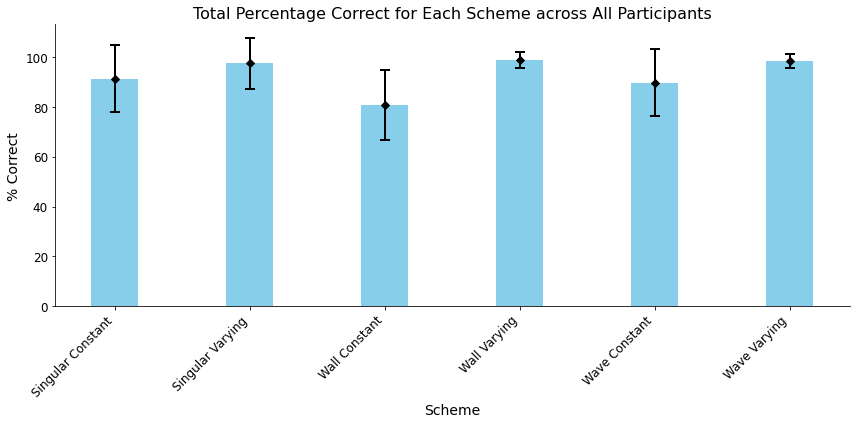

Scheme Singular Constant:
	-Total: 416
	-Accuracy: 91.23%
	-Mean: 21.89
	-STD: 13.38
Scheme Singular Varying:
	-Total: 444
	-Accuracy: 97.37%
	-Mean: 23.37
	-STD: 10.23
Scheme Wall Constant:
	-Total: 368
	-Accuracy: 80.70%
	-Mean: 19.37
	-STD: 14.13
Scheme Wall Varying:
	-Total: 450
	-Accuracy: 98.68%
	-Mean: 23.68
	-STD: 3.33
Scheme Wave Constant:
	-Total: 409
	-Accuracy: 89.69%
	-Mean: 21.53
	-STD: 13.54
Scheme Wave Varying:
	-Total: 449
	-Accuracy: 98.46%
	-Mean: 23.63
	-STD: 2.77
Total mean across all Schemes was 22.25


In [187]:
def plot_performance(totals, title, max_score=24, labels_fontsize=14, title_fontsize=16, tick_fontsize=12):
    # Calc percentages, means, and stds
    t = [sum(i) for i in totals.values()]
    print(totals.values())
    means = [np.mean(t) for t in totals.values()]
    totals_percentages = [np.mean(np.array(t) / max_score) * 100 for t in totals.values()]
    std_devs = [np.std(np.array(t) / max_score) * 100 for t in totals.values()]
    schemes = list(totals.keys())
    
    # Plot data
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.35
    index = np.arange(len(schemes))
    error_kw = {'ecolor': 'black', 'capsize': 5, 'elinewidth': 2, 'markeredgewidth': 2}
    bars = plt.bar(index, totals_percentages, bar_width, yerr=std_devs, color='skyblue', error_kw=error_kw)

    # Add diamonds for mean values
    for i in range(len(schemes)):
        plt.errorbar(index[i], totals_percentages[i], yerr=std_devs[i], fmt='D', color='black')
    
    plt.xlabel('Scheme', fontsize=labels_fontsize)
    plt.ylabel('% Correct', fontsize=labels_fontsize)
    plt.title(title, fontsize=title_fontsize)
    plt.xticks(index, schemes, rotation=45, ha="right", fontsize=tick_fontsize)
    plt.yticks(fontsize=tick_fontsize)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()
    
    return (t, totals_percentages, means, std_devs)


def get_results(totals, name):
    t, perc, means, std = plot_performance(scheme_totals, title="Total Percentage Correct for Each Scheme across All Participants")
    for i in range(len(totals.keys())):
        print(f"{name} {schemes[i]}:\n\t-Total: {t[i]}\n\t-Accuracy: {perc[i]:.2f}%\n\t-Mean: {means[i]:.2f}\n\t-STD: {std[i]:.2f}")

    print(f"Total mean across all {name}s was {np.mean(means):.2f}")
    
    
get_results(scheme_totals, "Scheme")

## Overall distance recognition accuracy of each participant with standard deviations

With 6 schemes, each with 24 vibrations. The total amount of vibrations for each participant was 6*24=144

dict_values([[24, 24, 19, 24, 23, 24], [22, 24, 19, 24, 18, 24], [23, 24, 18, 21, 15, 23], [23, 24, 20, 24, 24, 24], [23, 24, 17, 24, 23, 24], [24, 24, 13, 24, 23, 24], [16, 13, 16, 24, 23, 23], [24, 24, 17, 24, 22, 24], [22, 24, 14, 24, 15, 24], [22, 24, 14, 23, 14, 24], [23, 23, 23, 24, 24, 24], [23, 24, 24, 22, 22, 23], [24, 24, 21, 24, 24, 24], [22, 24, 24, 24, 22, 24], [11, 24, 20, 24, 23, 22], [24, 24, 21, 24, 23, 24], [24, 24, 23, 24, 24, 24], [19, 24, 23, 24, 23, 22], [23, 24, 22, 24, 24, 24]])


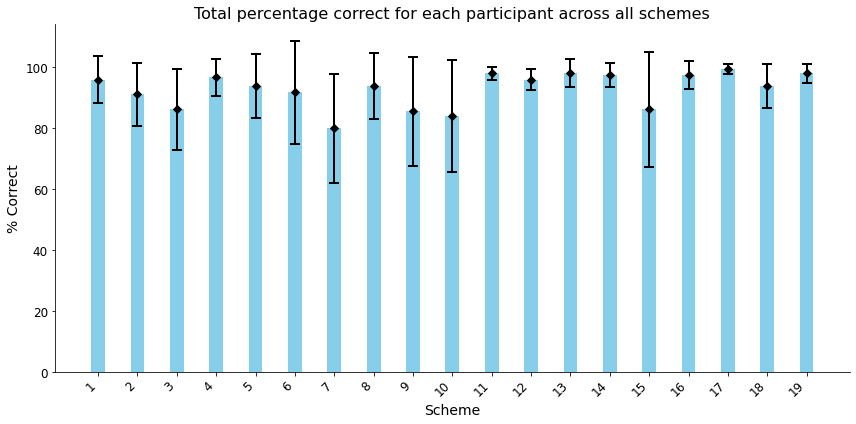

Participant 1:
	-Total: 138
	-Accuracy: 95.83%
	-Mean: 23.00
	-STD: 7.61
Participant 2:
	-Total: 131
	-Accuracy: 90.97%
	-Mean: 21.83
	-STD: 10.32
Participant 3:
	-Total: 124
	-Accuracy: 86.11%
	-Mean: 20.67
	-STD: 13.32
Participant 4:
	-Total: 139
	-Accuracy: 96.53%
	-Mean: 23.17
	-STD: 6.09
Participant 5:
	-Total: 135
	-Accuracy: 93.75%
	-Mean: 22.50
	-STD: 10.42
Participant 6:
	-Total: 132
	-Accuracy: 91.67%
	-Mean: 22.00
	-STD: 16.84
Participant 7:
	-Total: 115
	-Accuracy: 79.86%
	-Mean: 19.17
	-STD: 17.91
Participant 8:
	-Total: 135
	-Accuracy: 93.75%
	-Mean: 22.50
	-STD: 10.69
Participant 9:
	-Total: 123
	-Accuracy: 85.42%
	-Mean: 20.50
	-STD: 17.96
Participant 10:
	-Total: 121
	-Accuracy: 84.03%
	-Mean: 20.17
	-STD: 18.39
Participant 11:
	-Total: 141
	-Accuracy: 97.92%
	-Mean: 23.50
	-STD: 2.08
Participant 12:
	-Total: 138
	-Accuracy: 95.83%
	-Mean: 23.00
	-STD: 3.40
Participant 13:
	-Total: 141
	-Accuracy: 97.92%
	-Mean: 23.50
	-STD: 4.66
Participant 14:
	-Total: 140
	-Accuracy

NameError: name 'scheme_means' is not defined

In [188]:
p_totals = {}
for i in range(len(participant_totals.keys())):
    p_totals[i+1] = []
    for tot in scheme_totals.values():
        p_totals[i+1].append(tot[i])
        

p_t, p_perc, p_means, p_std = plot_performance(p_totals, title="Total percentage correct for each participant across all schemes")
for i in range(0, len(participant_totals.keys())):
    print(f"Participant {i+1}:\n\t-Total: {p_t[i]}\n\t-Accuracy: {p_perc[i]:.2f}%\n\t-Mean: {p_means[i]:.2f}\n\t-STD: {p_std[i]:.2f}")

print(f"Total mean across all participants was {np.mean(scheme_means):.2f}")

## Overall distance recognition accuracy of each distance with standard deviations

Each data collection trial has 12 vibrations: 4 far, 4 near, and 4 imminent.
Therefore each distance category has 48 vibrations across data collecion for each participant.
Meaning for 19 participants, each category had 19*48=912 vibrations

dict_values([[48, 47, 43, 47, 48, 45, 42, 48, 44, 47, 47, 46, 48, 47, 40, 48, 48, 47, 47], [48, 47, 45, 48, 42, 44, 39, 45, 43, 41, 47, 47, 47, 46, 44, 46, 48, 45, 48], [42, 37, 36, 44, 45, 43, 37, 42, 36, 33, 47, 45, 46, 47, 40, 46, 47, 43, 46]])


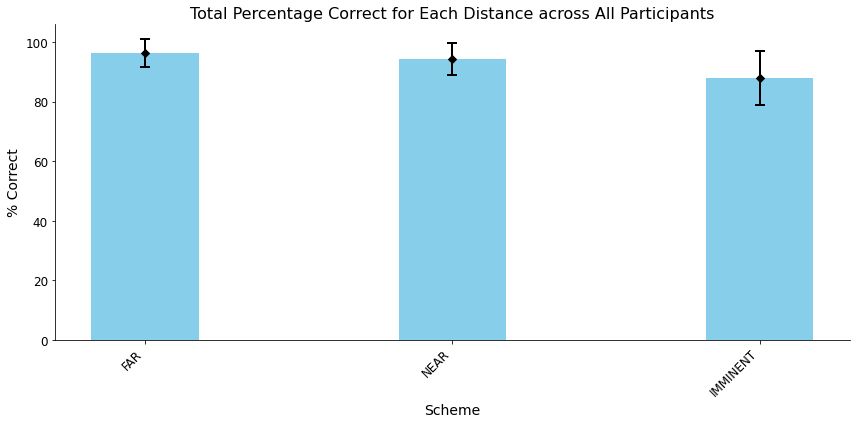

Distance FAR:
	-Total: 877
	-Accuracy: 96.16%
	-Mean: 46.16
	-STD: 4.70
Distance NEAR:
	-Total: 860
	-Accuracy: 94.30%
	-Mean: 45.26
	-STD: 5.23
Distance IMMINENT:
	-Total: 802
	-Accuracy: 87.94%
	-Mean: 42.21
	-STD: 8.98
Total mean across all distances was 44.54


In [189]:
d_totals = {"FAR": [], "NEAR": [], "IMMINENT": []}
for p, v in participant_totals.items():
    mistakes = participant_totals[p]["distance_mistakes"]
    for d, mis in mistakes.items():
        d_totals[d].append(48 - len(mis))

d_t, d_perc, d_means, d_std = plot_performance(d_totals, title="Total Percentage Correct for Each Distance across All Participants", max_score=48)
for i in range(0, len(distances)):
    print(f"Distance {distances[i]}:\n\t-Total: {d_t[i]}\n\t-Accuracy: {d_perc[i]:.2f}%\n\t-Mean: {d_means[i]:.2f}\n\t-STD: {d_std[i]:.2f}")

print(f"Total mean across all distances was {np.mean(d_means):.2f}")
        

## Distance recognition accuracy of each scheme grouped by distance with standard deviations
for each distance = 4
for each scheme = 2
for each participant = 1

for all distances = 12
for all schemes = 12
for all participants = 19

<br>

There are 4 * 2 = 8 vibrations for each distance, for each scheme, for each participant.

There are 4 * 2 * 19 = 152 vibrations for each distance, for each scheme, across all participants.

There are 4 * 12 = 48 vibrations for each distance, across all schemes, for each participant.

There are 4 * 12 * 19 = 912 vibrations for each distance, across all schemes, across all participants.

There are 12 * 2 * 1 = 24 vibrations for all distances, for each scheme, for each participant.

There are 12 * 2 * 19 = 456 vibrations for all distances, for each scheme, for all participants.

There are 12 * 12 * 1 = 144 vibrations for all distances, for all schemes, for each participant.

There are 12 * 12 * 19 = 2736 vibrations for all distances, for all schemes, for all participants.

#### Suggested Changes to following versions
- remove full borders
- turn into percentage correct
- add standard deviation
- these visualisation don't include participants actual guesses (e.g. Missed). Should this be included somehow?

### Version 2: Absolute Mistake Count grouped by Scheme


<ipython-input-207-79719701370e>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i/100 for i in range(0, 100+1, 20)], fontsize=12)


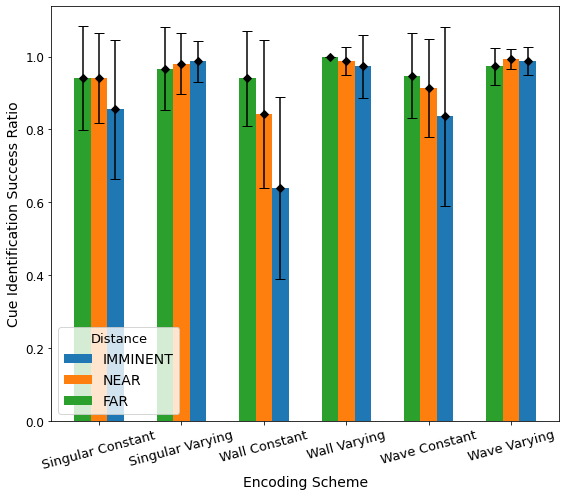

"\ntotal_attempts = 152\n\nfig, ax = plt.subplots(figsize=(10, 8))\nschemes = schemes[::-1]\nscheme_positions = np.arange(len(schemes))\nbar_width = 0.2\n\n# Offset position for each distance group\ndistance_offsets = np.arange(len(distances)) * bar_width\n\nprint(mistake_count)\n\n# Plot bars for each distance within each scheme\nfor idx, distance in enumerate(distances):\n    percentage_correct = [(total_attempts-mistake_count[distance][scheme]) / total_attempts * 100 for scheme in schemes]\n    #mistake_counts = [mistake_count[distance][scheme] for scheme in schemes]\n    bars = ax.barh(scheme_positions - distance_offsets[idx], percentage_correct, bar_width, label=distance)\n    # Add value labels next to each bar\n    for bar in bars:\n        width = bar.get_width()\n        label_x_pos = bar.get_x() + width if width >= 0 else bar.get_x()\n        ax.text(label_x_pos+0.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center')\n\n\nax.set_yticks(scheme_positions - bar_wi

In [207]:
total_attempts_per_part = 8  
total_attempts = 152
mean_percentage_correct = {}
std_devs = {}
data = part_mistake_count


for distance, schemes in data.items():
    mean_percentage_correct[distance] = {}
    std_devs[distance] = {}
    for scheme, correct_counts in schemes.items():
        correct_counts = [total_attempts_per_part - count for count in correct_counts]
        percentages = [count / total_attempts_per_part * 100 for count in correct_counts]
        mean_percentage_correct[distance][scheme] = np.mean(percentages)
        std_devs[distance][scheme] = np.std(percentages)
        
        
        

#print(mean_percentage_correct)
#print(std_devs)

fig, ax = plt.subplots(figsize=(8, 7))
schemes = list(data['FAR'].keys())  # Assuming all distances have the same schemes
scheme_positions = np.arange(len(schemes))
bar_width = 0.2
distance_offsets = np.arange(3) * bar_width
distances = list(data.keys())

for idx, distance in enumerate(distances[::-1]):
    percentage_correct = [(total_attempts - sum(data[distance][scheme])) / total_attempts * 100 for scheme in schemes]
    #print(percentage_correct)
    means = [mean_percentage_correct[distance][scheme] for scheme in schemes]
    #print(means)
    errors = [std_devs[distance][scheme] for scheme in schemes]
    bars = ax.bar(scheme_positions - distance_offsets[idx], percentage_correct, bar_width, yerr=errors, capsize=5, label=distance)
    ax.plot(scheme_positions - distance_offsets[idx], means, 'D', color='black', markersize=5)

#for spine in spines:
#    ax.spines[spine].set_visible(False)
    
ax.set_xticks(scheme_positions - bar_width)
ax.set_xticklabels(schemes, rotation=15, fontsize=13)
ax.set_ylabel('Cue Identification Success Ratio', fontsize=14)
ax.set_yticklabels([i/100 for i in range(0, 100+1, 20)], fontsize=12)
ax.set_xlabel('Encoding Scheme', fontsize=14)
#ax.set_title('Mean % Correct by Encoding Scheme and Distance', fontsize=16)
ax.legend(title='Distance', fontsize=14, title_fontsize=13)
plt.tight_layout()
plt.savefig(f"Mean Correct by Encoding Scheme.pdf", bbox_inches = 'tight', pad_inches = 0.05, transparent = True)
plt.show()
    
  
        


"""
total_attempts = 152

fig, ax = plt.subplots(figsize=(10, 8))
schemes = schemes[::-1]
scheme_positions = np.arange(len(schemes))
bar_width = 0.2

# Offset position for each distance group
distance_offsets = np.arange(len(distances)) * bar_width

print(mistake_count)

# Plot bars for each distance within each scheme
for idx, distance in enumerate(distances):
    percentage_correct = [(total_attempts-mistake_count[distance][scheme]) / total_attempts * 100 for scheme in schemes]
    #mistake_counts = [mistake_count[distance][scheme] for scheme in schemes]
    bars = ax.barh(scheme_positions - distance_offsets[idx], percentage_correct, bar_width, label=distance)
    # Add value labels next to each bar
    for bar in bars:
        width = bar.get_width()
        label_x_pos = bar.get_x() + width if width >= 0 else bar.get_x()
        ax.text(label_x_pos+0.5, bar.get_y() + bar.get_height() / 2, f'{width:.2f}%', va='center')


ax.set_yticks(scheme_positions - bar_width / 2)
ax.set_yticklabels(schemes)
ax.set_xlabel('Mistake %')
ax.set_title('Mistake % by Encoding Scheme and Distance')

ax.legend(title='Distance', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=len(distances))
plt.tight_layout()
plt.show()
"""

### Version 3

{'Singular Constant': {'FAR': {'FAR': 0, 'NEAR': 8, 'IMMINENT': 0, 'MISSED': 1}, 'NEAR': {'FAR': 9, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'IMMINENT': {'FAR': 3, 'NEAR': 14, 'IMMINENT': 0, 'MISSED': 5}}, 'Singular Varying': {'FAR': {'FAR': 0, 'NEAR': 2, 'IMMINENT': 2, 'MISSED': 1}, 'NEAR': {'FAR': 1, 'NEAR': 0, 'IMMINENT': 2, 'MISSED': 0}, 'IMMINENT': {'FAR': 2, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}}, 'Wall Constant': {'FAR': {'FAR': 0, 'NEAR': 5, 'IMMINENT': 4, 'MISSED': 0}, 'NEAR': {'FAR': 2, 'NEAR': 0, 'IMMINENT': 22, 'MISSED': 0}, 'IMMINENT': {'FAR': 5, 'NEAR': 50, 'IMMINENT': 0, 'MISSED': 0}}, 'Wall Varying': {'FAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 0, 'MISSED': 0}, 'NEAR': {'FAR': 0, 'NEAR': 0, 'IMMINENT': 1, 'MISSED': 1}, 'IMMINENT': {'FAR': 0, 'NEAR': 3, 'IMMINENT': 0, 'MISSED': 1}}, 'Wave Constant': {'FAR': {'FAR': 0, 'NEAR': 7, 'IMMINENT': 1, 'MISSED': 0}, 'NEAR': {'FAR': 1, 'NEAR': 0, 'IMMINENT': 11, 'MISSED': 1}, 'IMMINENT': {'FAR': 4, 'NEAR': 21, 'IMMINENT': 0, 'MISSED'

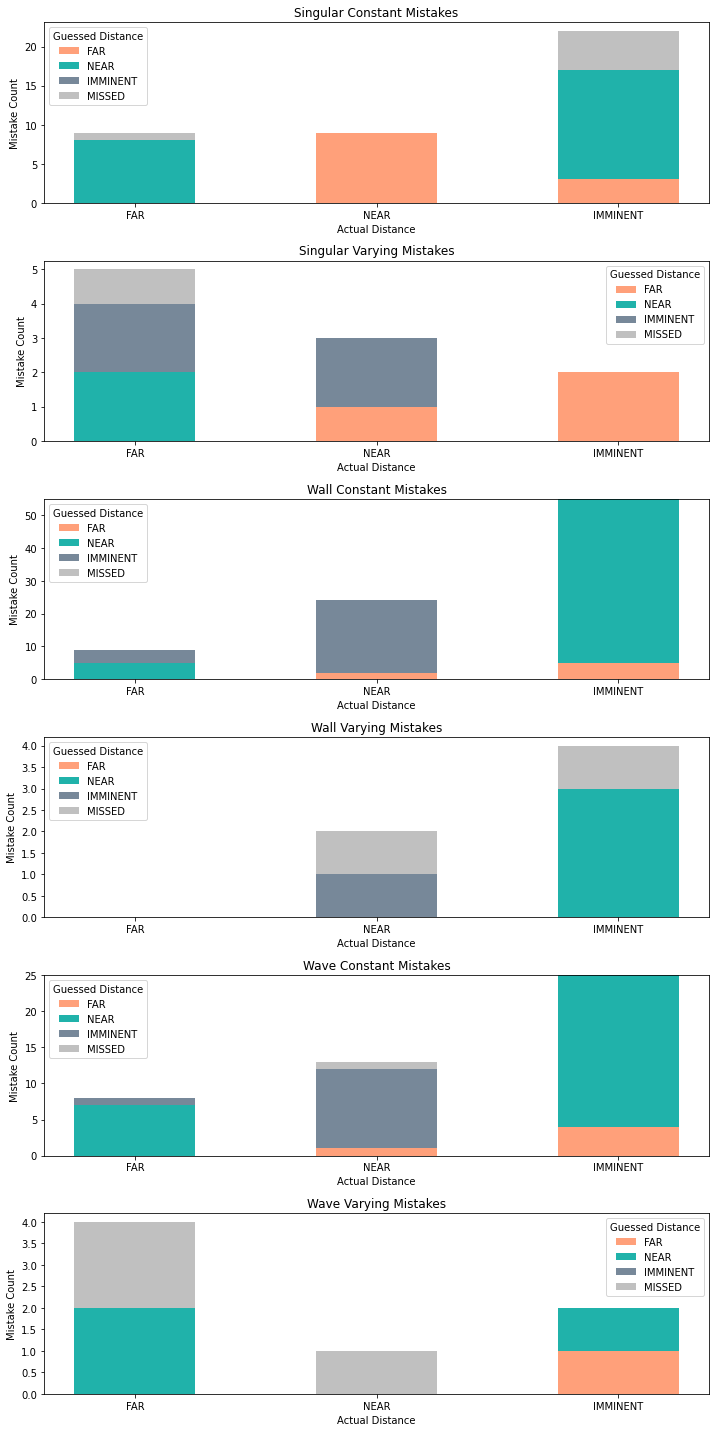

In [191]:
order_of_distances = ['FAR', 'NEAR', 'IMMINENT', 'MISSED']
colors = ['#FFA07A', '#20B2AA', '#778899', '#C0C0C0']  # light salmon, light sea green, light slate gray, silver

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 20), tight_layout=True)
print(mistakes_schemes)
print(mistake_count)

for i, (scheme, distances_dict) in enumerate(mistakes_schemes.items()):
    bottoms = np.zeros(3)
    
    for idx, (guess, color) in enumerate(zip(order_of_distances, colors)):
        counts = [distances_dict[actual][guess] for actual in order_of_distances[:-1]]  # exclude 'MISSED' for x-axis labels
        axes[i].bar(order_of_distances[:-1], counts, bottom=bottoms, color=color, label=guess, width=0.5)
        bottoms += np.array(counts)
        
        axes[i].set_title(f'{scheme} Mistakes')
        axes[i].set_xlabel('Actual Distance')
        axes[i].set_ylabel('Mistake Count')
        axes[i].legend(title='Guessed Distance')


### Version 4

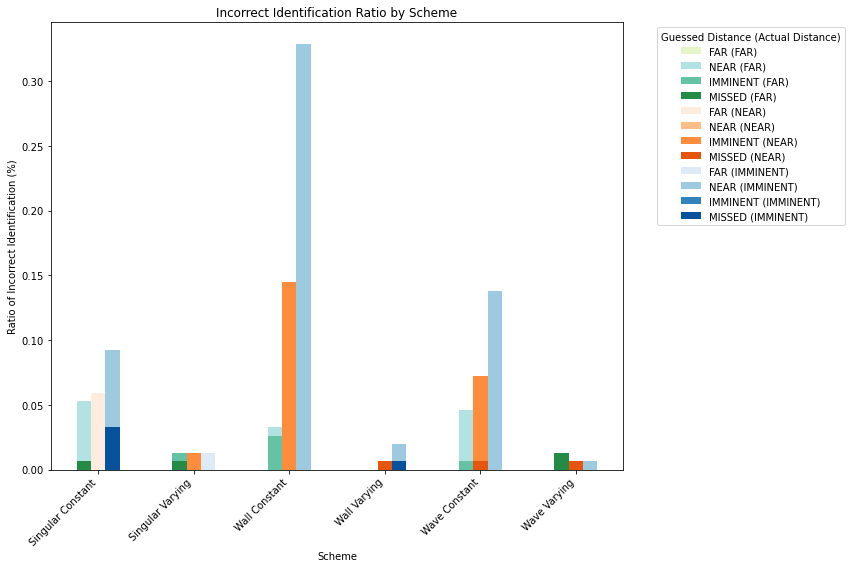

In [62]:
# Adjusting the code to use gradients of one color for each actual distance category and updating the legend accordingly

# Define gradients of colors for each actual distance category
color_gradients = {
    'FAR': ['#e6f5c9', '#b2e2e2', '#66c2a4', '#238b45'],  # Greenish gradients
    'NEAR': ['#feedde', '#fdbe85', '#fd8d3c', '#e6550d'],  # Orangish gradients
    'IMMINENT': ['#deebf7', '#9ecae1', '#3182bd', '#08519c'],  # Bluish gradients
}

total_vibrations_per_distance = 152
fig, ax = plt.subplots(figsize=(12, 8))

n_distances = len(order_of_distances[:-1])  # Exclude 'MISSED'
n_schemes = len(mistakes_schemes)
scheme_names = list(mistakes_schemes.keys())
width = 0.15  # Width of the bars

# Calculate positions for each set of schemes
positions = np.arange(n_schemes)

for i, actual in enumerate(order_of_distances[:-1]):  # Exclude 'MISSED' from actual distances
    colors = color_gradients[actual]
    
    for idx, guess in enumerate(order_of_distances):
        
        counts = np.array([mistakes_schemes[scheme][actual].get(guess, 0) for scheme in scheme_names])
        correct_counts = total_vibrations_per_distance - counts.sum(axis=0) if guess == 'CORRECT' else counts
        ratios = correct_counts / total_vibrations_per_distance
        
        # Position adjustments for grouped bar chart
        distance_positions = positions + (i - (n_distances / 2 - 0.5)) * width
        label = f'Correct ({actual})' if guess == 'CORRECT' and positions[0] == 0 else ""
        # use counts instead of ratios if wanting actual values
        ax.bar(distance_positions, ratios, color=colors[idx], width=width, label=f'{guess} ({actual})' if positions[0] == 0 else "")


ax.set_title('Incorrect Identification Ratio by Scheme')
ax.set_xlabel('Scheme')
ax.set_ylabel('Ratio of Incorrect Identification (%)')
ax.set_xticks(positions)
ax.set_xticklabels(scheme_names, rotation=45, ha="right")

# Create a custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color_gradients[actual][idx], label=f'{guess} ({actual})') 
                   for actual in order_of_distances[:-1] for idx, guess in enumerate(order_of_distances)]
ax.legend(handles=legend_elements, title='Guessed Distance (Actual Distance)', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Was there a learning effect bias?
The average gradient of the slope across all participants was 0.027. As this is close to 0, we can say that learning effect did not bias results

In [ ]:
means = []
slopes = [] 
trials = [i for i in range(1, 13)]

for p, results in participant_totals.items():
    t = results["aggs"]["data_trial_totals"]
    means.append(np.mean(t))
    slope, intercept = np.polyfit(trials, t, 1)
    slopes.append(slope)


plt.show()
print(f"Giving a total mean of {np.mean(means)}")
print(f"Average slope across participants: {np.mean(slopes)}")
